# DATA ANALYTICS

### Goal

The following case is an example of how to predict the relationship between the dependent variable 'Sales Price' and the independent variables 'Qual Geral', 'TotalSportS', 'Neighborhood' and 'GrLivArea'.

#### What are we going to do in this project?

1. Understand the problem. 
2. Study the dependent variable ("SalePrice").
3. Study the relationship between the dependent variable and the independent variables are related.
4. Clean up the dataset and deal with missing data outliers and categorical variables.
5. Test Assumptions.

### Let's work!

### Import relevant libraries

At this point, we are going to import the relevant libraries to run all the code we need for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

### Load the data

Download the train file containing the data needed for this project.

In [2]:
df= pd.read_csv('sample_submission.csv')

In [3]:
df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [4]:
df_data = pd.read_csv('train.csv')

In [5]:
df_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

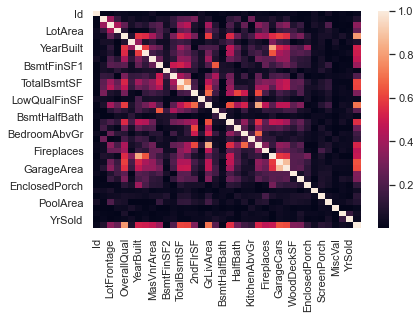

In [22]:
corrmatrix=df_data.corr().abs()

sns.heatmap(corrmatrix);

To understand our data, we need to understand the meaning of each variable and its importance for this project.

As we analyze the variables we have selected, we have to answer the following questions:
1) When we buy a house, do we think about the variables mentioned?

2) If yes, what is the importance of this variable?

After this brainstorming, we can look carefully at the variables ​​and present the answers in some scatterplots between these variables ​​and 'Sales Price'.

### Analysing "SalePrice"

We want to understand how the 'SalePrice' variant varies with the following variants:
* Characteristics of the 'OverallQual' building

* Space of the property 'TotalBsmtSF'

* Location of the property 'Neighborhood'

Let's describe ("SalePrice")


In [7]:
df_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

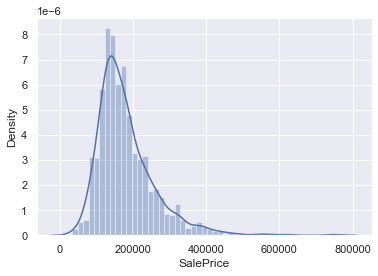

In [8]:
sns.distplot(df_data['SalePrice'])

In [9]:
s1 = df_data['SalePrice'].skew()
k1 = df_data['SalePrice'].kurt()
print(s1)
print(k1)

1.8828757597682129
6.536281860064529


### Analysing the relationship between variables

### Plot the datas

#### Create a preliminary plot to see if we can spot SalePrice with OverallQual

Text(0, 0.5, 'SalePrice')

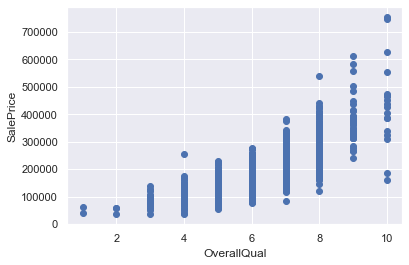

In [10]:
plt.scatter(df_data['OverallQual'],df_data['SalePrice'])

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

SalePrice relates quite well to the OverallQual variable. The more qualified the house, the more expensive it is.

#### Create a preliminary plot to see if we can spot SalePrice with TotalBsSF

Text(0, 0.5, 'SalePrice')

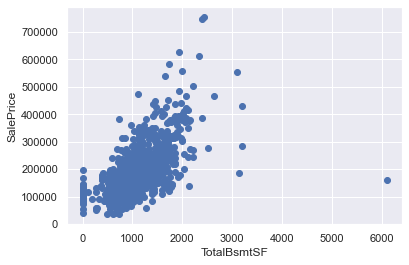

In [11]:
plt.scatter(df_data['TotalBsmtSF'],df_data['SalePrice'])

plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

The relationship between "SalePrice" and "TotalBsmtSF" is strong linear.

#### Create a preliminary plot to see if we can spot SalePrice with Neighborhood

Text(0, 0.5, 'SalePrice')

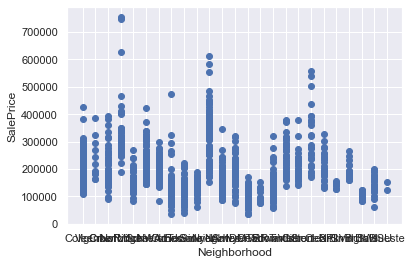

In [12]:
plt.scatter(df_data['Neighborhood'],df_data['SalePrice'])

plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

SalePrice is not so linear with "Neighborhood". Let's say it's not a very influenceable variable.

Text(0, 0.5, 'SalePrice')

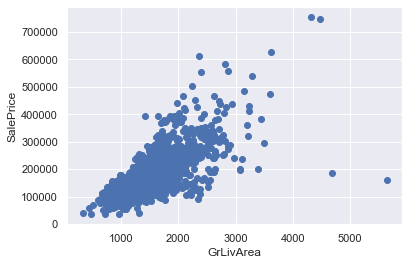

In [13]:
plt.scatter(df_data['GrLivArea'],df_data['SalePrice'])

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

The relationship between "SalePrice" and "GrLivArea" is linear.

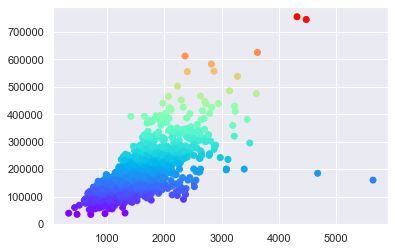

In [14]:
plt.scatter(df_data['GrLivArea'], df_data['SalePrice'], c= df_data['SalePrice'], cmap = 'rainbow')

Let's see this luminous relationship with rainbow colors!

### In short:
'GrLivArea' and 'TotalBsmtSF' align with 'SalePrice'. This means that when one of these variables increases, the other also increases. In the case of TotalBsmtSF ', the slope is high.

OverllQual aligns with SalePrice, that is, the more SalePrice increases, the more OverallQual increases as well. They work in perfect harmony. 

The other variables GrLivArea and TotalBsmtSF are linear with SalePrice, that is, they increase as SalePrice increases, but there are exceptions because, when we noticed, we conclude that SalePrice does not always increase simultaneously with TotalBsmtSF and GrLivArea.

### What about the relation between SalePrice and YearBuilt???

Text(0, 0.5, 'SalePrice')

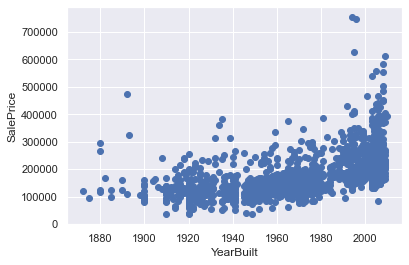

In [15]:
plt.scatter(df_data['YearBuilt'],df_data['SalePrice'])

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

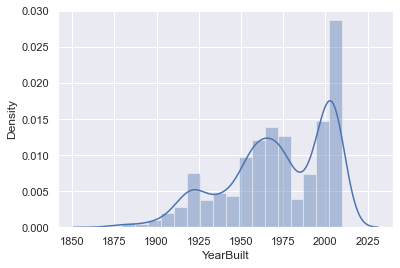

In [16]:
sns.distplot(df_data['YearBuilt'])

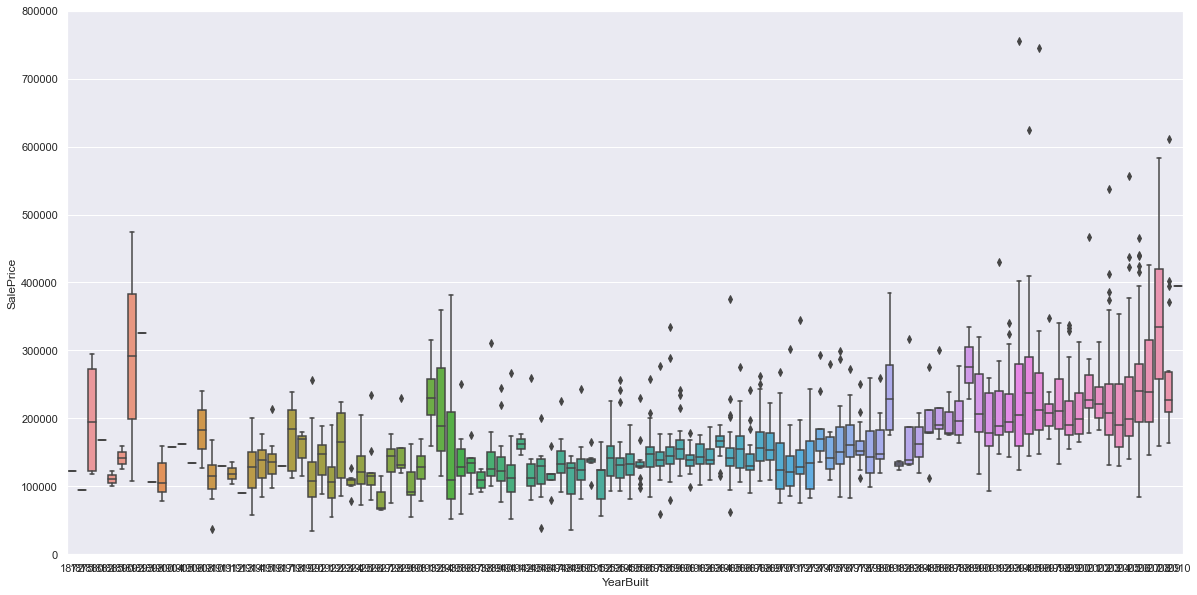

In [17]:
var = 'YearBuilt'
data = pd.concat([df_data['SalePrice'], df_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Relationship between 'Sale Price' and Year Built is linear. The newer the house, the more the price increases. tends to spend more money on new things than on old relics.

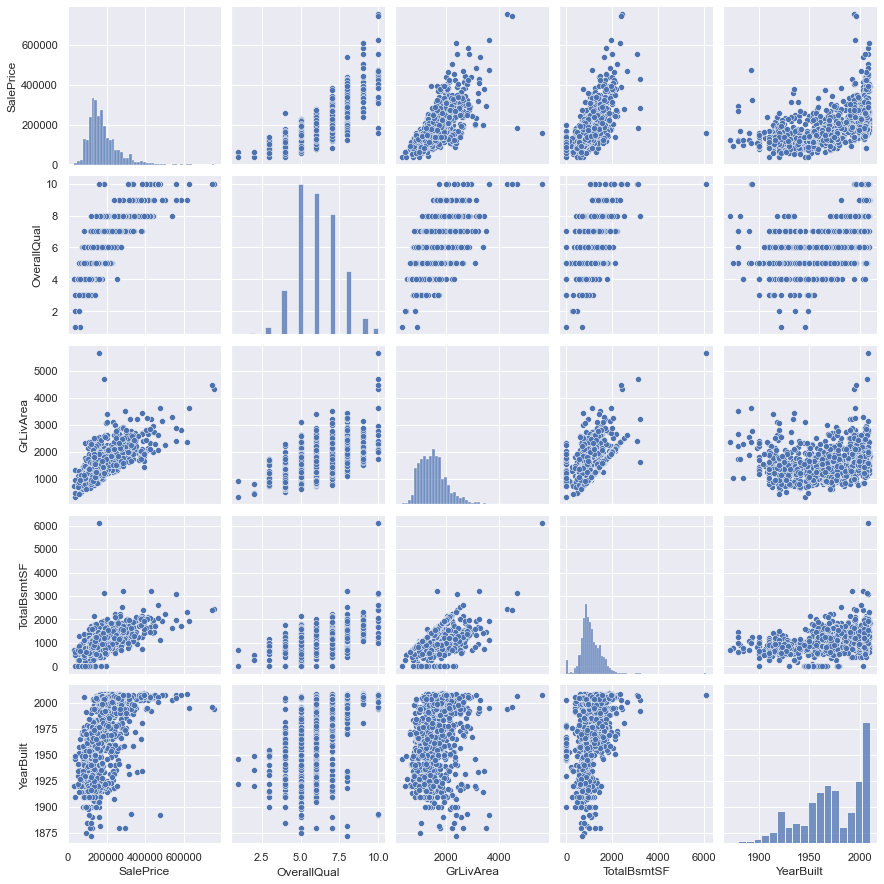

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_data[cols], size = 2.5)
plt.show();

The scatter plot allows us to perceive with greater precision the relationships of the variables selected for this project.

### Missing data

In [20]:
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


To deal with missing data, let's delete all 'missing data' variables, minus the 'Electrical' variable.

<AxesSubplot:>

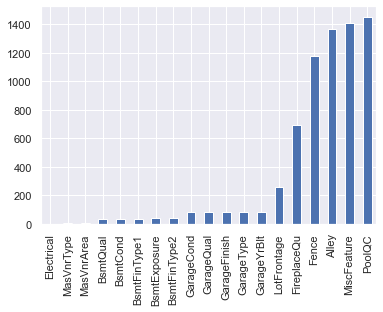

In [21]:
missing = df_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

### Conclusion

We look at 'Sale Price' alone and with the most correlated variables as well as dealing with missing data.

In [24]:
df_data['SalePriceCpy'] = df_data['SalePrice'].copy()

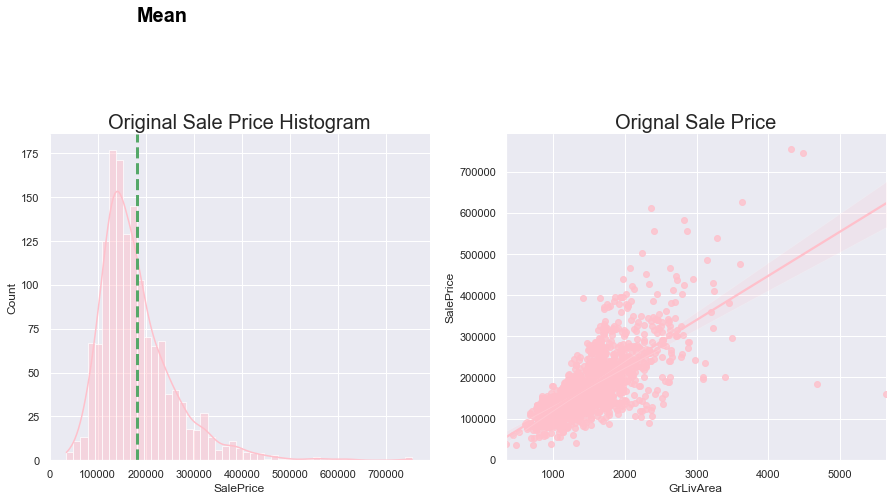

In [31]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(df_data['SalePrice'],color='Pink',kde=True)
plt.axvline(x=df_data['SalePrice'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(df_data['SalePrice'].mean(), 250, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)
ax2 = plt.subplot(1,2,2)
sns.regplot(data=df_data, y="SalePrice", x="GrLivArea",ax=ax2,color='Pink')
ax2.set_title('Orignal Sale Price',fontsize=20)
sns.despine()

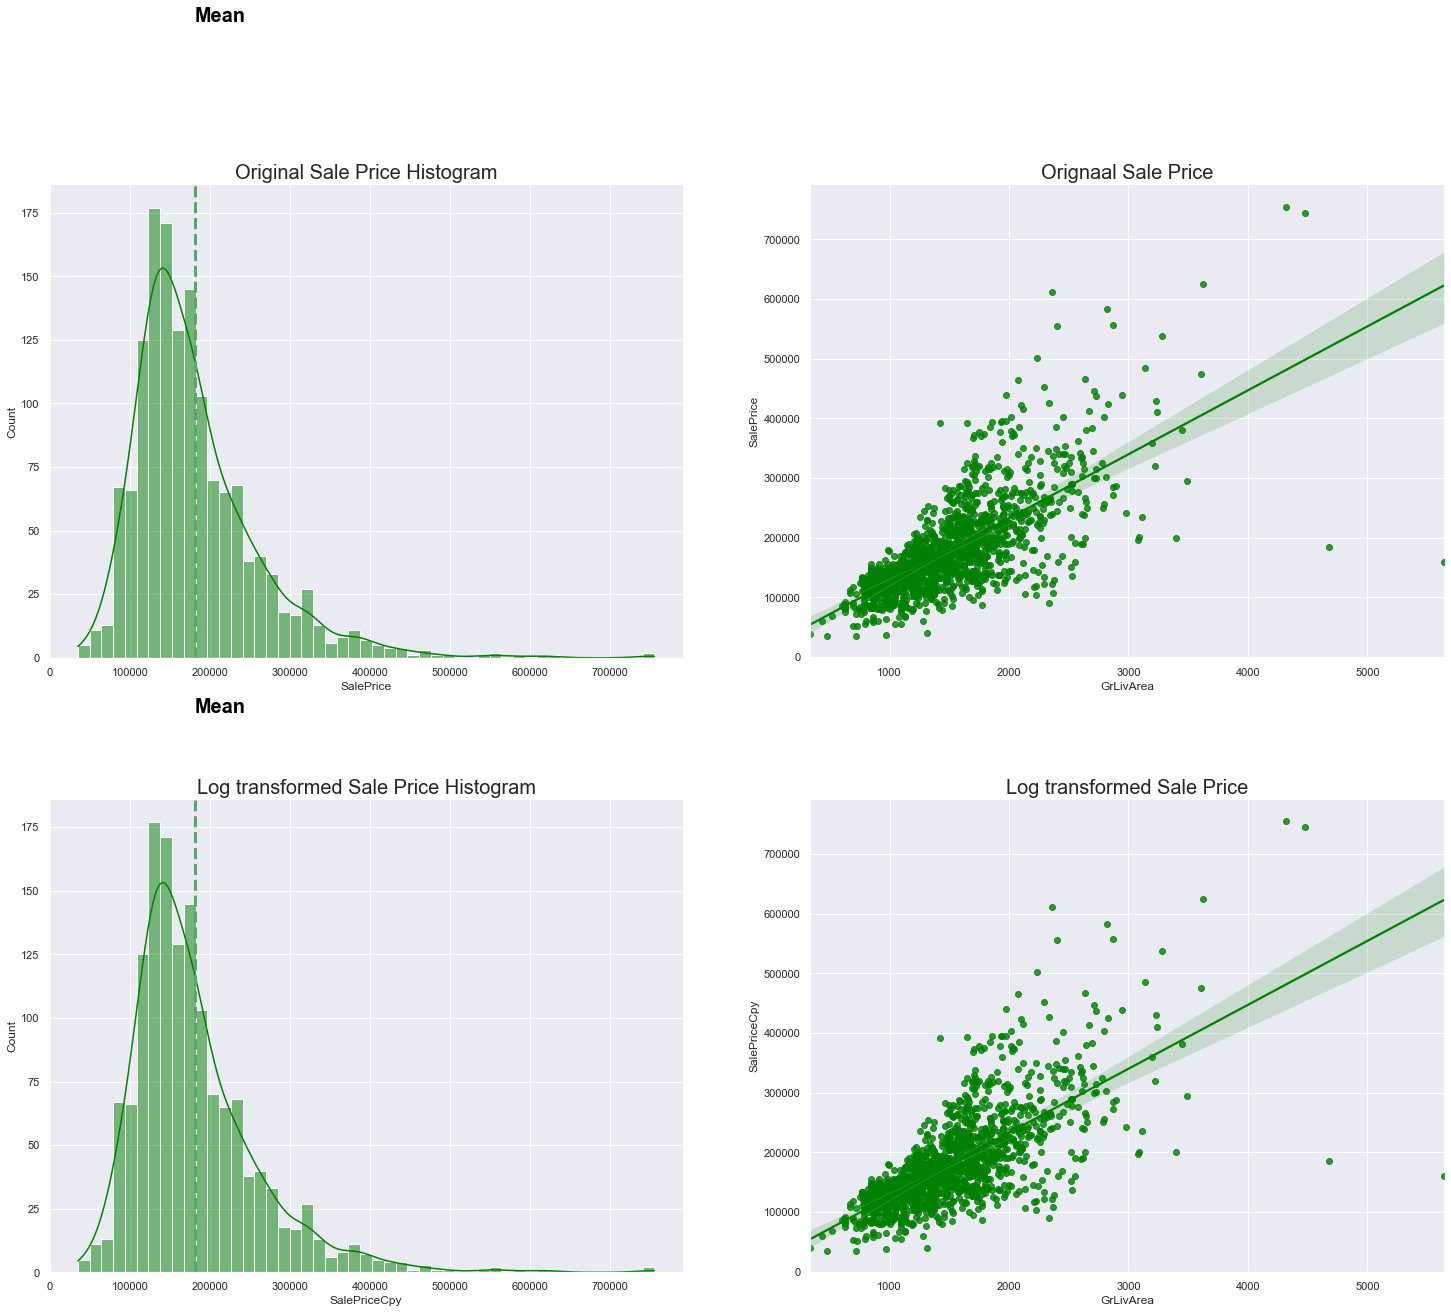

In [32]:
plt.figure(figsize = (25,20))
plt.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(2,2,1)
sns.histplot(df_data['SalePrice'],color='Green',kde=True)
plt.axvline(x=df_data['SalePrice'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(df_data['SalePrice'].mean(), 250, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)
ax2 = plt.subplot(2,2,2)
sns.regplot(data=df_data, y="SalePrice", x="GrLivArea",ax=ax2,color='Green')
ax2.set_title('Orignaal Sale Price',fontsize=20)
ax3 = plt.subplot(2,2,3)
sns.histplot(df_data['SalePriceCpy'],color='Green',kde=True)
plt.axvline(x=df_data['SalePriceCpy'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(df_data['SalePriceCpy'].mean(), 220, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Log transformed Sale Price Histogram',fontsize=20)
ax4 = plt.subplot(2,2,4)
sns.regplot(data=df_data, y="SalePriceCpy", x="GrLivArea",ax=ax4,color='Green')
ax4.set_title('Log transformed Sale Price',fontsize=20)
sns.despine()

When looking at the regression graph between Gravure and Selling Price, we can see that the clearest regression line is drawn after conversion.